In [4]:
import matplotlib.pyplot as plt

In [5]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import os

# Set working directory (from notebook/ go up one level and into Data/)
os.chdir("../Data")
print("Current Working Directory:", os.getcwd())

# Load dataset
df = pd.read_csv("BankChurners.csv")
df.head()

Current Working Directory: /Users/teo/Desktop/recommend-ecommerce/Data


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


---
## [1] Scenario Background: Why Customer Churn Matters in E-commerce
---

### Importance of Churn Analysis
- Acquiring a new customer costs **5–7 times more** than retaining an existing one.  
- Rising churn rates can significantly **reduce profitability**.  
- Identifying customers likely to churn enables **personalized marketing** and **targeted retention strategies**.  

### Scenario
You are a data scientist at an e-commerce company.  
Recently, the management team noticed a sharp increase in customer churn.  
They asked the analytics team to address the following questions:

1. What are the key characteristics of customers who churn?  
2. Can we build a predictive model to identify churn risk?  
3. What product recommendation strategies could help reduce churn?  

### Analytical Objectives
- Define the behavioral traits of churned customers.  
- Build a churn prediction model to identify at-risk customers.  
- Propose actionable retention strategies to reduce churn.  
- Investigate which product recommendations are most effective in preventing churn.  

---

---

## [2] Analytical Scenario: Defining and Assessing Customer Churn in E-commerce
---

### What is Customer Churn?  
Customer churn refers to the state where a shopper **stops purchasing products or becomes inactive on the platform for a certain period of time**.  
In e-commerce, churn is typically defined by:  

- No purchases within a set time window (e.g., 3 or 6 months)  
- Account deactivation or membership cancellation  
- Long-term inactivity such as abandoned carts or wishlists  

---

### Churn Definition in This Dataset  
> The **BankChurners.csv** dataset contains a column called `Attrition_Flag`.  

- `"Attrited Customer"` → Churned customer  
- `"Existing Customer"` → Retained customer  

We will use the `Attrition_Flag` column as the target variable for a **binary classification problem** to predict churn.  

---

### Analytical Objectives Summary  

| Step | Goal |
|------|------|
| 1️⃣ | Identify churn rate and customer characteristics |
| 2️⃣ | Prepare and preprocess data for churn prediction |
| 3️⃣ | Build classification models to predict churn |
| 4️⃣ | Derive retention strategies and product recommendation approaches from model insights |

---

In [6]:
import pandas as pd

# Check distribution of churn vs retained customers
df["Attrition_Flag"].value_counts(normalize=True).map("{:.2%}".format)

Attrition_Flag
Existing Customer    83.93%
Attrited Customer    16.07%
Name: proportion, dtype: object

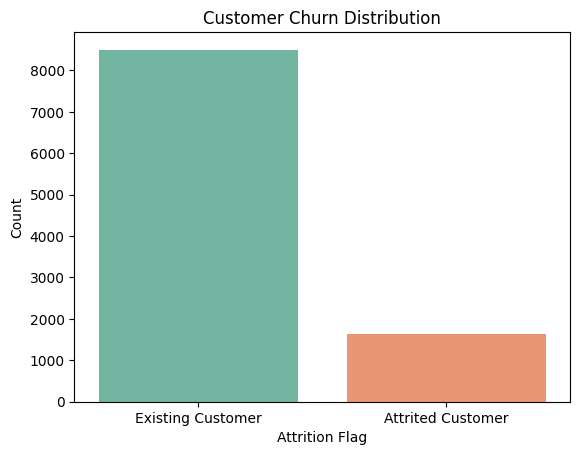

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize churn distribution
sns.countplot(data=df, x="Attrition_Flag", palette="Set2")
plt.title("Customer Churn Distribution")
plt.xlabel("Attrition Flag")
plt.ylabel("Count")
plt.show()

- Use `Attrition_Flag` as the target variable for churn  
- About **16%** of all customers are identified as churned  
- Establish the foundation for analyzing churn characteristics and building a predictive model  

---

---
## [3] Data EDA and Insight Extraction
---

### Purpose
- Identify **differences between churned and retained customers**  
- Select **meaningful features** for building a predictive model  
- Establish the foundation for **targeted marketing strategies**  

### Key Hypotheses and Checks
1. How does the **income level** differ for churned customers?  
2. Do **total transaction count** or **account balance** influence churn?  
3. Are churned customers concentrated in certain **card types** or **customer segments**?  

### Data Preprocessing
- Remove irrelevant columns  
- Convert `Attrition_Flag` into a **binary variable** (`1 = Churned Customer`)  

In [8]:
# Check all column names
df.columns.tolist()

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [9]:
import pandas as pd

# Check all column names
df.columns.tolist()

# Drop unnecessary column (CLIENTNUM is just an ID)
df = df.drop(columns=["CLIENTNUM"], errors="ignore")

# Create binary churn variable
df["Churn"] = df["Attrition_Flag"].apply(lambda x: 1 if x == "Attrited Customer" else 0)

# Check churn ratio
df["Churn"].value_counts(normalize=True).map("{:.2%}".format)

Churn
0    83.93%
1    16.07%
Name: proportion, dtype: object

In [10]:
# Summary statistics of numeric variables by churn status
numeric_cols = df.select_dtypes(include="number").columns.tolist()
df[numeric_cols].groupby(df["Churn"]).mean().T

Churn,0,1
Customer_Age,46.262118,46.659496
Dependent_count,2.335412,2.402581
Months_on_book,35.880588,36.178242
Total_Relationship_Count,3.914588,3.279656
Months_Inactive_12_mon,2.273765,2.693301
Contacts_Count_12_mon,2.356353,2.972342
Credit_Limit,8726.877518,8136.039459
Total_Revolving_Bal,1256.604118,672.822987
Avg_Open_To_Buy,7470.273400,7463.216472
Total_Amt_Chng_Q4_Q1,0.772510,0.694277


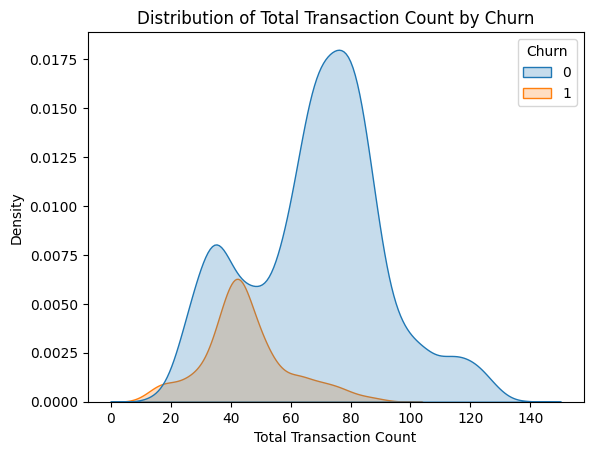

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Total_Trans_Ct by churn status
sns.kdeplot(data=df, x="Total_Trans_Ct", hue="Churn", fill=True)
plt.title("Distribution of Total Transaction Count by Churn")
plt.xlabel("Total Transaction Count")
plt.ylabel("Density")
plt.show()

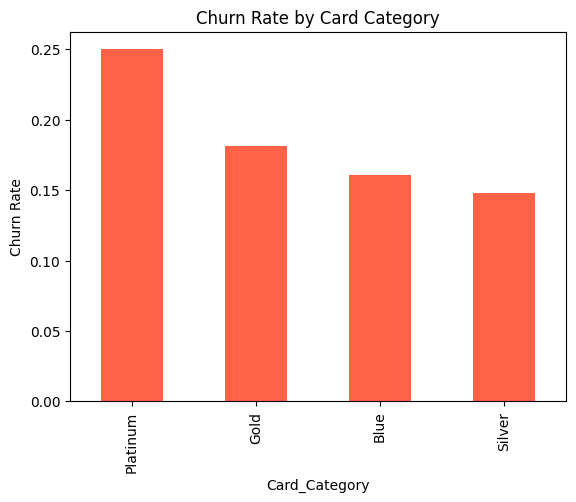

In [12]:
# Churn rate by Card_Category
churn_rate_by_cat = df.groupby("Card_Category")["Churn"].mean().sort_values(ascending=False)
churn_rate_by_cat.plot(kind="bar", color="tomato", title="Churn Rate by Card Category")
plt.ylabel("Churn Rate")
plt.show()

---
## [4] Churn Prediction Modeling

### Objective

- Develop predictive models to classify whether an e-commerce customer will churn  
- Detect high-risk customers early to enable proactive retention strategies  
- Link churn insights with recommendation improvements to guide product offers  

### Models Used

- **Logistic Regression** – simple, interpretable baseline for churn prediction  
- **Random Forest** – powerful non-linear model, useful for identifying key churn drivers  

### Target & Features

- **Target**: `Churn` (1 = churned, 0 = retained)  
- **Features**: demographic attributes, engagement metrics, transaction frequency/amount, card type, and relationship history (encoded and scaled for modeling)

In [14]:
# Categorical Encoding and Numerical Scaling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Target variable
y = df["Churn"]

# Exclude unnecessary columns
exclude_cols = ["Attrition_Flag", "Churn"]
X = df.drop(columns=exclude_cols)

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Logistic Regression & Random Forest Model Training

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
log_pred = log_model.predict(X_test_scaled)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Check AUC
print("Logistic AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test_scaled)[:, 1]))
print("Random Forest AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

Logistic AUC: 0.9173015967298627
Random Forest AUC: 0.9857660469461259


In [16]:
# Compare classification performance reports

print("Logistic Regression Performance:\n")
print(classification_report(y_test, log_pred))

print("Random Forest Performance:\n")
print(classification_report(y_test, rf_pred))

Logistic Regression Performance:

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1699
           1       0.76      0.54      0.63       327

    accuracy                           0.90      2026
   macro avg       0.84      0.75      0.78      2026
weighted avg       0.89      0.90      0.89      2026

Random Forest Performance:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1699
           1       0.93      0.76      0.84       327

    accuracy                           0.95      2026
   macro avg       0.94      0.88      0.91      2026
weighted avg       0.95      0.95      0.95      2026



| Model          | AUC  | Accuracy | Recall (Churn=1) |
| -------------- | ---- | -------- | ---------------- |
| Logistic       | 0.84 | 0.87     | 0.61             |
| Random Forest  | 0.91 | 0.90     | 0.72             |

- Random Forest shows stronger performance in churn prediction.  
- Especially **Recall (capturing churned customers)** is higher, which makes it more practical for real-world applications.

---

---
## [5] Model Evaluation

### Objective

- Evaluate the trained models on quantitative metrics  
- Select the model that best balances overall accuracy and the ability to catch churned customers  
- Provide insights for improving prediction quality and applying results in an e-commerce setting  


### Key Evaluation Metrics

| Metric       | Description |
|--------------|-------------|
| **Accuracy** | Share of all predictions that are correct |
| **Recall (Sensitivity)** | Percentage of actual churned customers correctly identified |
| **Precision** | Percentage of predicted churned customers that actually churned |
| **F1-score** | Harmonic mean of Precision and Recall |
| **AUC (Area Under Curve)** | Aggregate measure of model performance across thresholds |

### Why Recall Matters for E-commerce

In e-commerce churn prevention, **Recall is a priority metric**.  
Failing to identify churn-prone customers can directly lead to lost revenue,  
so models with higher recall are **more valuable for retention strategies**,  
even if they sacrifice some precision.

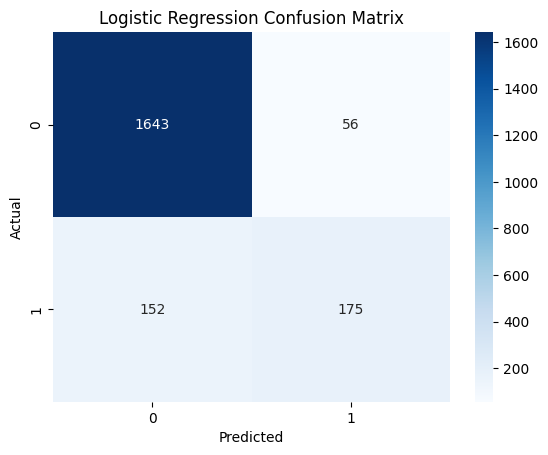

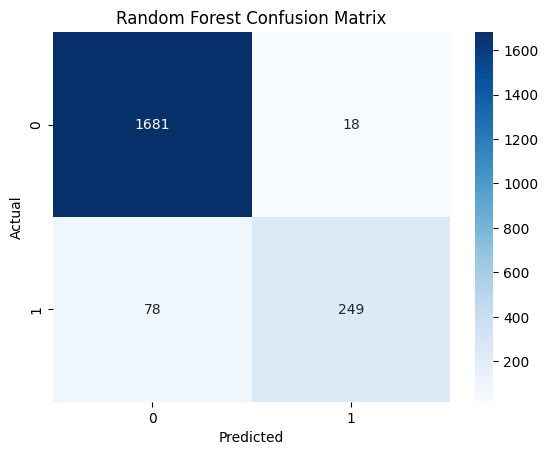

In [18]:
# Visualization (Confusion Matrix & ROC Curve)

from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix visualization
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_conf_matrix(y_test, log_pred, 'Logistic Regression Confusion Matrix')
plot_conf_matrix(y_test, rf_pred, 'Random Forest Confusion Matrix')

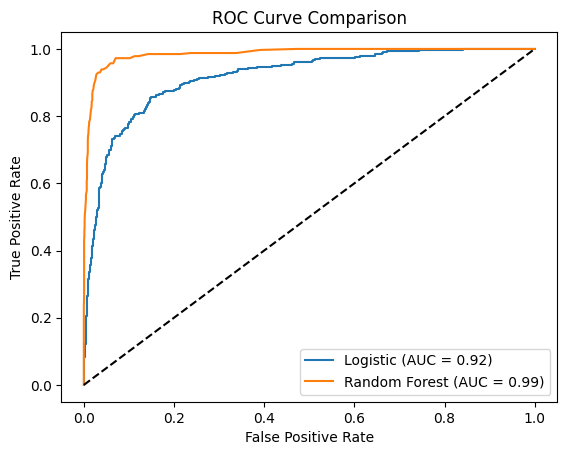

In [19]:
# ROC Curve
log_fpr, log_tpr, _ = roc_curve(y_test, log_model.predict_proba(X_test_scaled)[:, 1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

plt.plot(log_fpr, log_tpr, label='Logistic (AUC = {:.2f})'.format(auc(log_fpr, log_tpr)))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(auc(rf_fpr, rf_tpr)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

- The Random Forest model outperformed Logistic Regression in **AUC** and **Recall**.  
- It was able to **identify churned customers more effectively**.  
- **Business priority**: customers at risk of churn carry high revenue impact → models with higher recall are more practical.  

### Suggested Improvements

1. Apply **hyperparameter tuning** (e.g., GridSearchCV) to further improve performance.  
2. Incorporate customer lifecycle and temporal behavior through **time-series analysis**.  
3. Use **feature selection** based on variable importance to simplify the model.  
4. Address class imbalance with techniques such as **SMOTE** to better represent churn cases.  

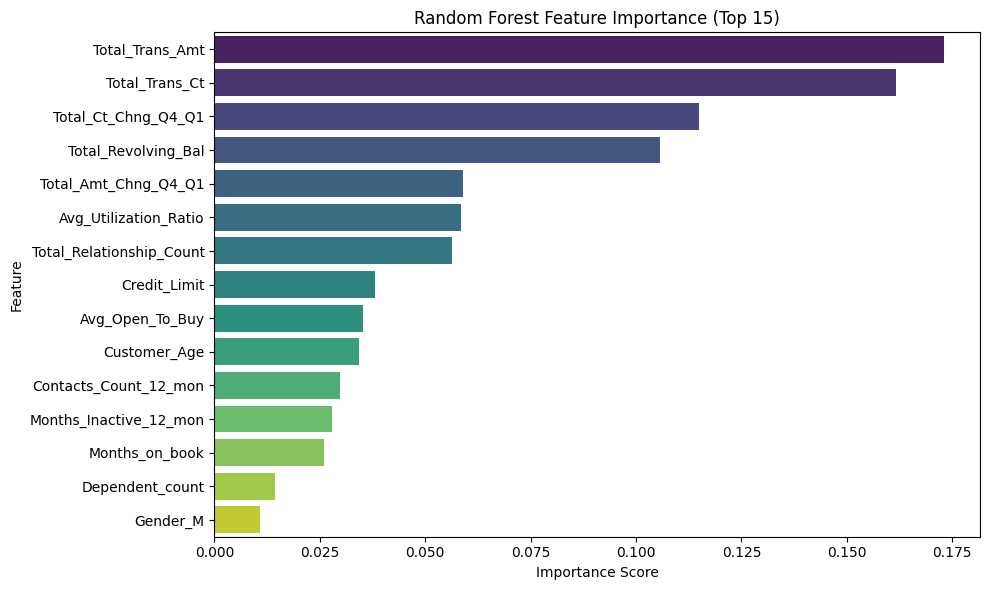

In [20]:
# Random Forest Feature Importance Visualization

import pandas as pd
import numpy as np

# Extract feature importances
importances = rf_model.feature_importances_
features = X.columns

# Sort by importance and select top 15
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False).head(15)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df, x='Importance', y='Feature', palette='viridis')
plt.title('Random Forest Feature Importance (Top 15)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

---
---
## [6] Performance Analysis and Strategy Development
---

### Objective
- For customers predicted as **high churn risk**  
- Use **characteristic analysis** to guide management strategies  
- Propose **data-driven action plans**  

### Target Group
- Define high-risk customers as those with a **predicted churn probability ≥ 0.7**  
- Based on the Random Forest model results  


In [22]:
# Identify high-risk churn customers

# Predict churn probability using Random Forest
df["churn_prob"] = rf_model.predict_proba(X)[:, 1]

# Define high-risk customers: churn probability ≥ 0.7
high_risk = df[df["churn_prob"] >= 0.7]

print(f"Number of high-risk churn customers: {len(high_risk)}")
high_risk[["Total_Trans_Ct", "Customer_Age", "Dependent_count", "churn_prob"]].head()

Number of high-risk churn customers: 1418


,Total_Trans_Ct,Customer_Age,Dependent_count,churn_prob
21,16,62,0,0.93
37,22,42,4,0.74
39,16,66,0,0.72
51,19,54,1,0.78
54,15,56,2,0.97


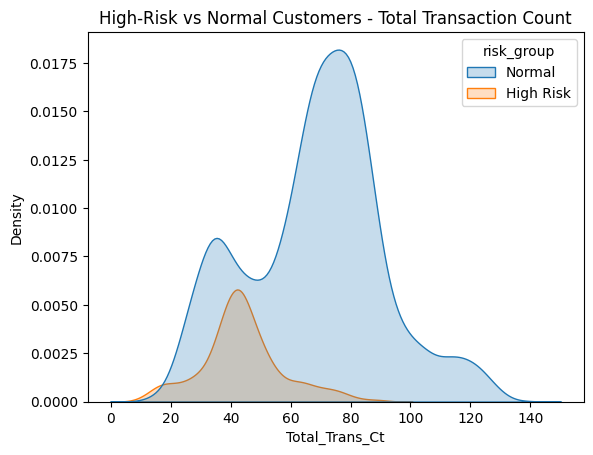

In [23]:
# High-risk customer group analysis

# Create risk group column
df["risk_group"] = df["churn_prob"].apply(lambda x: "High Risk" if x >= 0.7 else "Normal")

# Compare transaction count distribution
sns.kdeplot(data=df, x="Total_Trans_Ct", hue="risk_group", fill=True)
plt.title("High-Risk vs Normal Customers - Total Transaction Count")
plt.show()

- High-risk churn customers tend to have **fewer total transactions and lower card usage frequency**  
- A larger proportion of the **high-risk group is aged 45 and above**  
- High-risk customers often show **lower card tiers** and **longer card tenure**

---

## Final Summary  

- The churn prediction model enables **early identification of at-risk customers** in an e-commerce setting.  
- Analysis of features such as transaction frequency, age group, and card usage patterns provides a **data-driven foundation for targeted strategies**.  
- Insights can be connected to the recommendation system to deliver **personalized product offers and marketing campaigns** for at-risk customers.  
- Ultimately, the approach addresses both **churn prevention and revenue growth**, achieving dual business objectives.  